# Display origin of prototypes

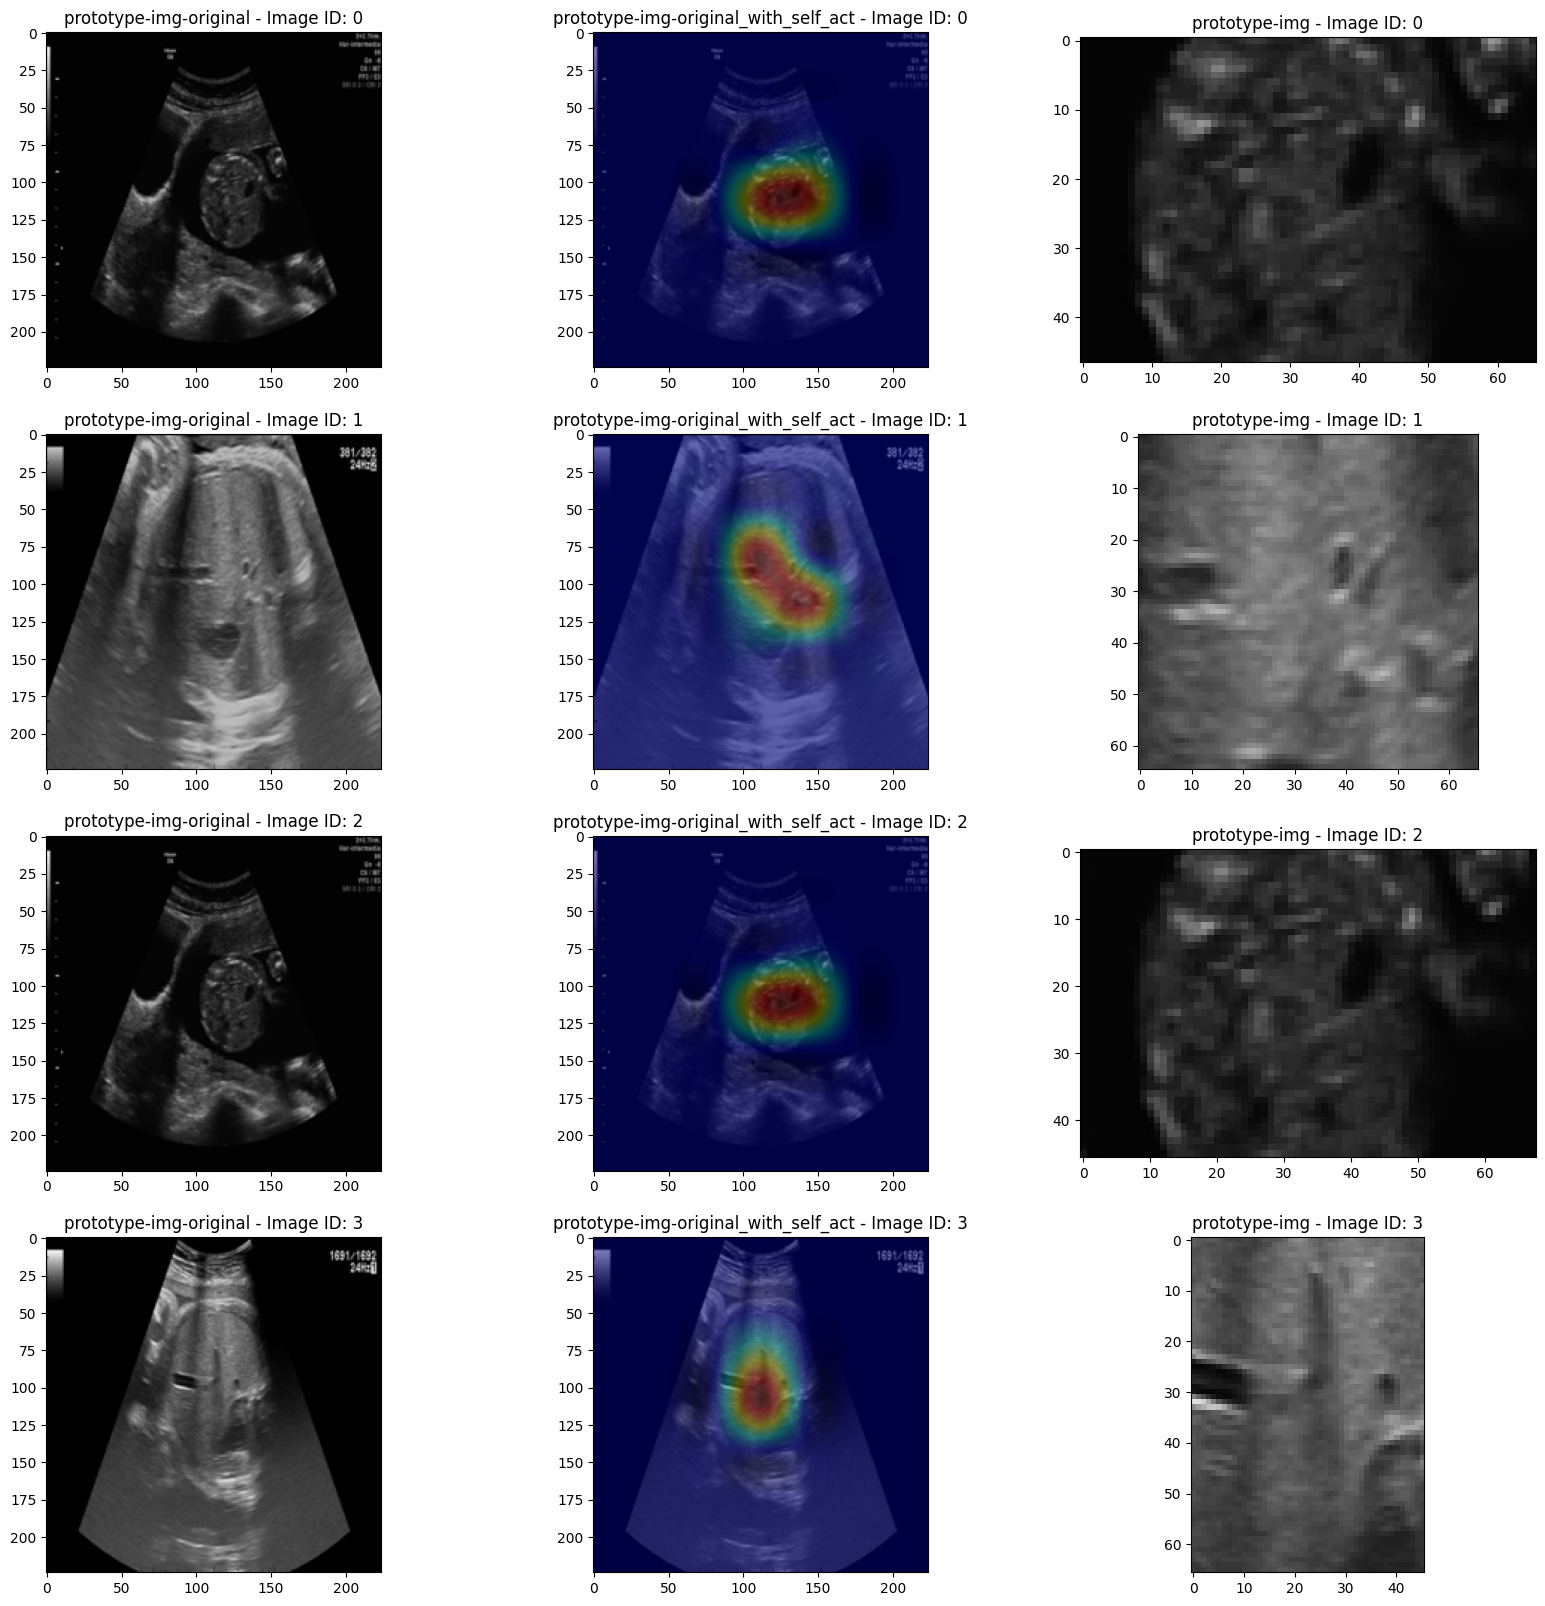

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
#os.chdir("../Prototype Analysis")
#a = np.loadtxt("../Data/CUB_200_2011/CUB_200_2011/train_test_split.txt",delimiter=" ")

img_types = ["prototype-img-original","prototype-img-original_with_self_act","prototype-img"]


###########
prototype_ids = [0,1,2,3]
###########

fig, axs = plt.subplots(len(prototype_ids),3,figsize=(20,20))

for j,id in enumerate(prototype_ids):
    for i, img_type in enumerate(img_types):
        a = "img/epoch-10/" +img_type + str(id) + ".png"
        im = plt.imread(a)
        axs[j,i].imshow(im)
        axs[j,i].set_title(img_type + f" - Image ID: {id}")




# Analyze .npy files

In [10]:
base = "img/epoch-10/"
f1 = base + "bb-receptive_field10.npy" # --> Activation pattern
f2 = base + "bb10.npy" # --> Activation pattern
f3_base = base + "prototype-self-act" # --> Activation pattern in latent space
f4 = "prune_info.npy"

rec_filed = np.load(f1)
print(rec_filed.shape)

bb20 = np.load(f2)
print(bb20.shape)
print(bb20[:10,:])

self_act = np.load(f3_base + "4" + ".npy") 
print(self_act.shape) 

prune_info = np.load(f4)
print(prune_info.shape)

(70, 6)
(70, 6)
[[338  86 133  95 161   0]
 [184  64 129  94 160   0]
 [338  87 133  94 162   0]
 [ 44  68 134  89 135   0]
 [259  85 133  63 130   0]
 [136  68 149  97 150   0]
 [259  85 133  63 130   0]
 [215  58 103  94 162   0]
 [346  70 154  75 125   0]
 [325  83 137  88 147   0]]
(7, 7)
(1930, 2)


/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB


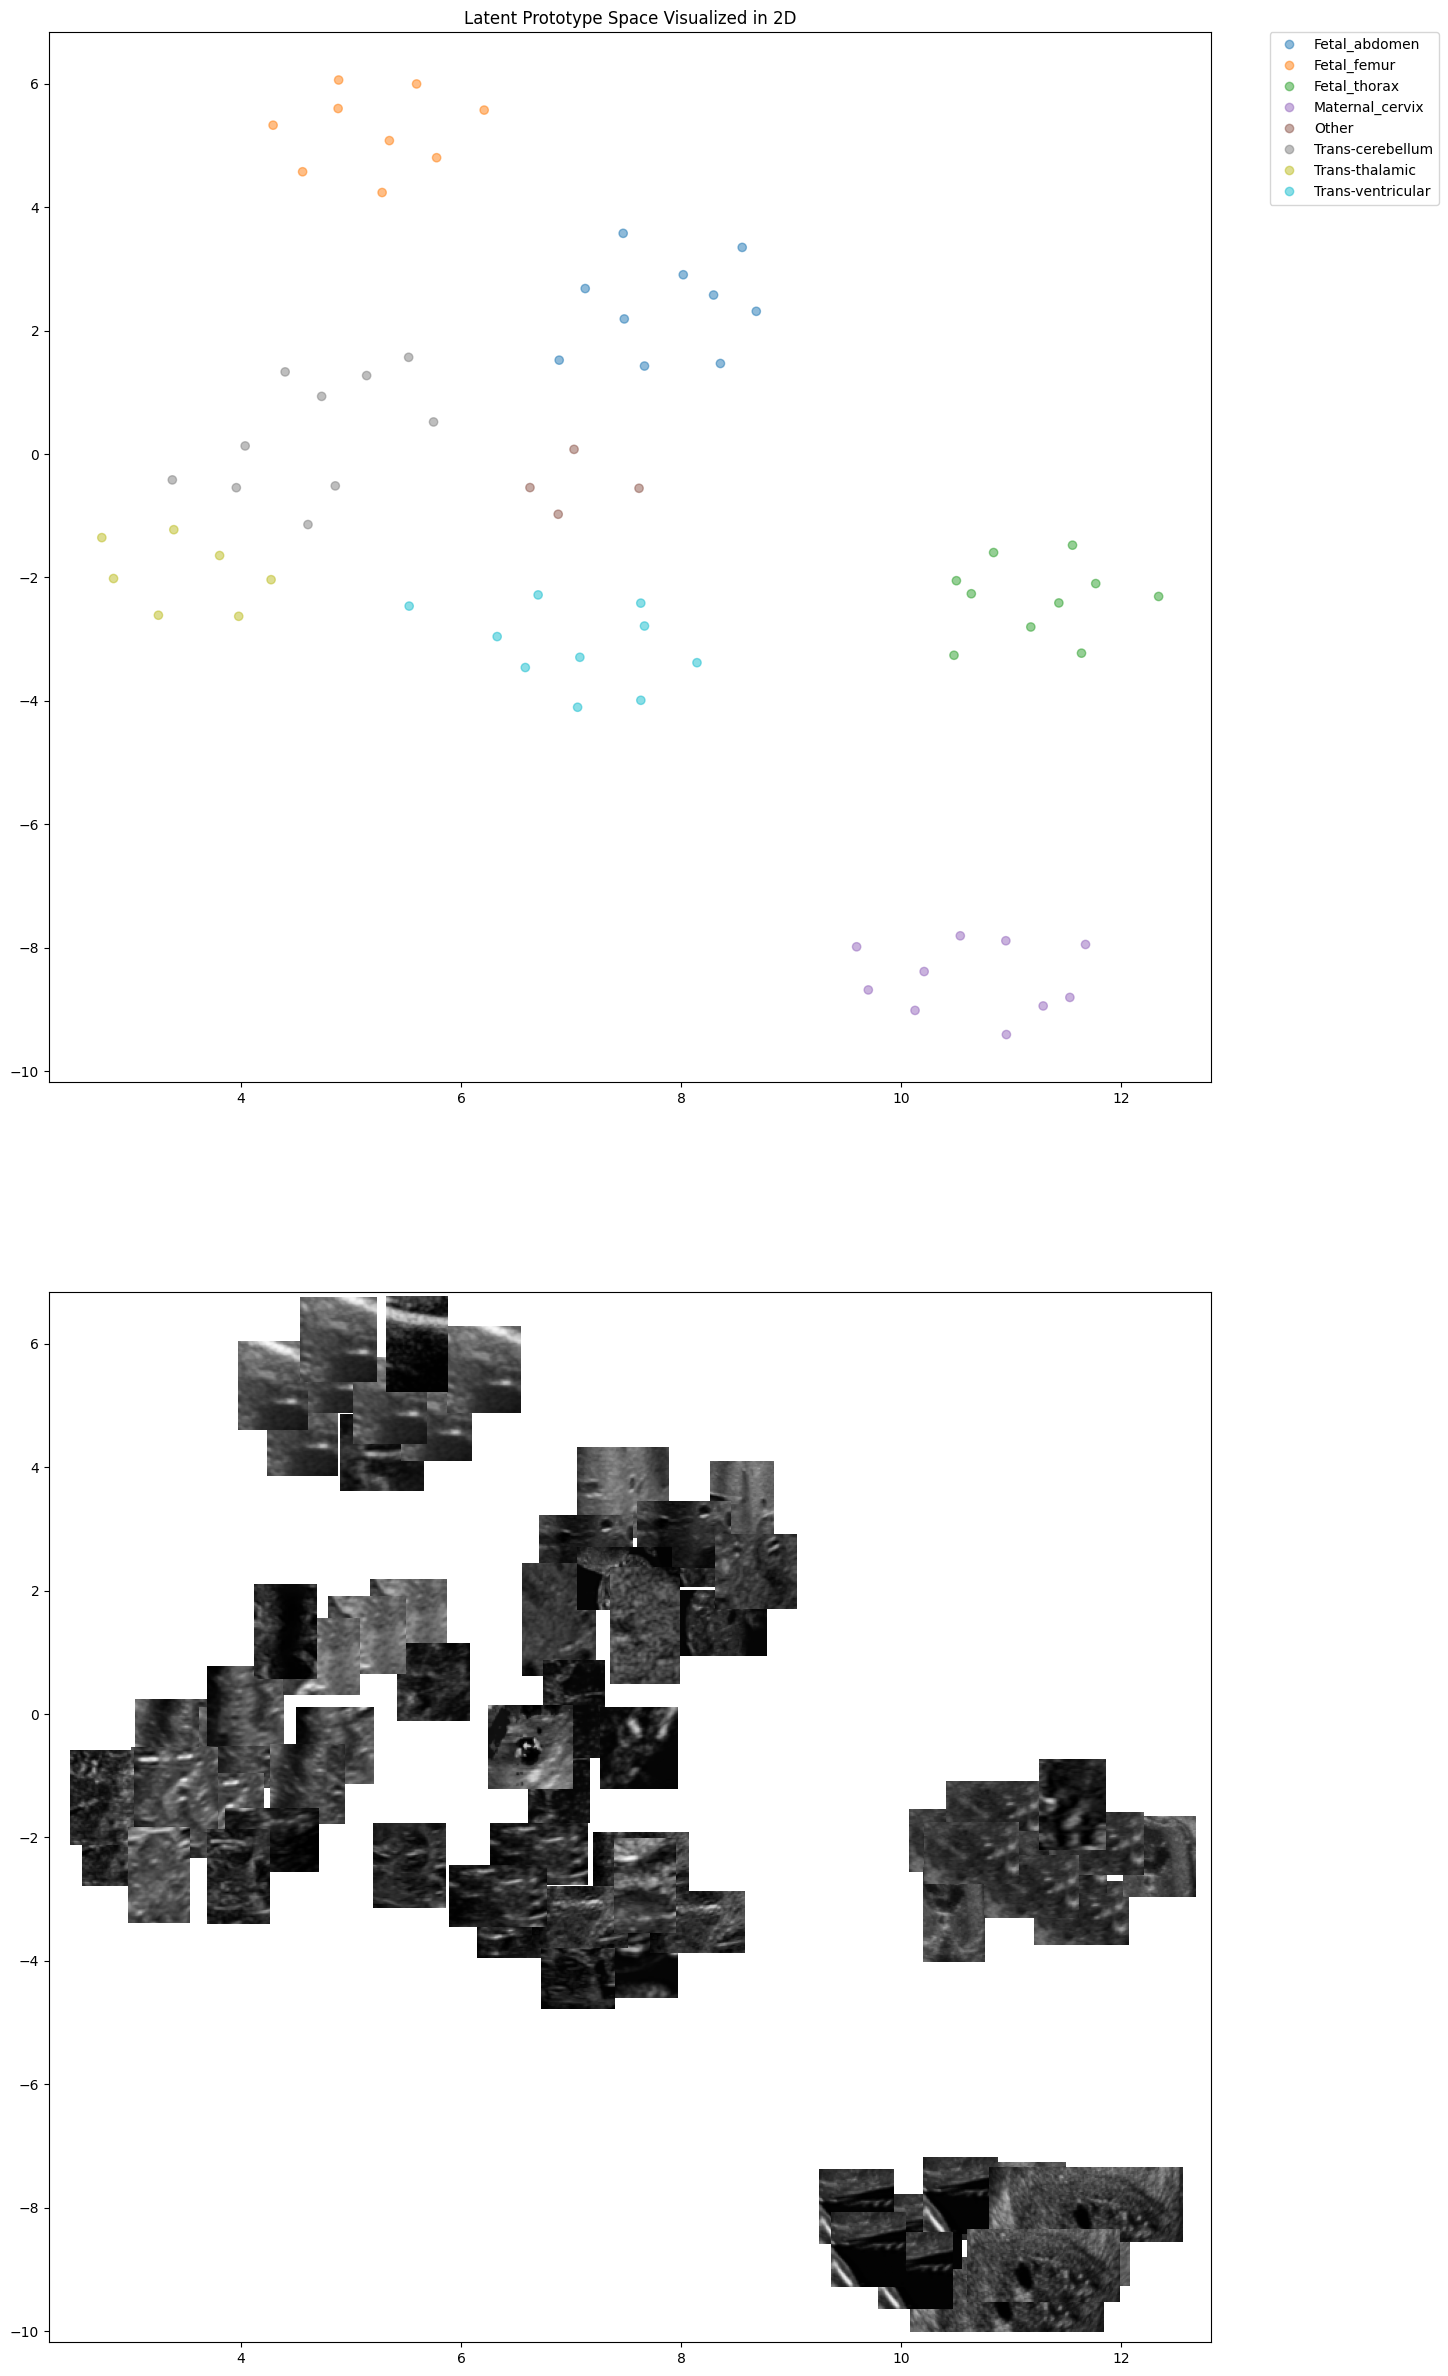

In [23]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Other",5:"Trans-cerebellum",6:"Trans-thalamic",7:"Trans-ventricular"}
colors = bb20[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB/10prune0.8960.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB")

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=50,metric="euclidean",min_dist=0.9)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]

# * Plot prototypes in 2d
fig, ax = plt.subplots(2,1,figsize=(15,30))
ax[0].set_title("Latent Prototype Space Visualized in 2D")
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab10",alpha=0.5)
handles, _ = scatter.legend_elements()
legend = ax[0].legend(handles,labels,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

# * Plot prototypes with corresponding images
artists = []
zoom = 1
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), width, height, linewidth=3, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()




In [9]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
import numpy as np

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Other",5:"Trans-cerebellum",6:"Trans-thalamic",7:"Trans-ventricular"}
#colors = bb20[:,-1]
#labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB/10prune0.8960.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB")

print(prototypes.shape)
print(len(np.unique(prototypes,axis=1)))

/Users/mats/Desktop/Master/DTU Sem 3 - WS2223/Deep Learning/Project/Code/Prototype Analysis/FETAL_DB
(70, 128)
70


# Best Model Visualization

In [12]:
import torch
import os
import umap
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

# * load class info from file
base = "img/epoch-10/"
f2 = base + "bb10.npy" # --> Activation pattern
bb10 = np.load(f2) 

# * get class info and prepare coloring
class_map = {0:"Fetal_abdomen",1:"Fetal_femur",2:"Fetal_thorax",3:"Maternal_cervix",4:"Trans-cerebellum",5:"Trans-thalamic",6:"Trans-ventricular"}
colors = bb20[:,-1]
labels = [class_map[el] for el in list(set(colors))]

# * load prototypes
if os.getcwd().split("/")[-1] != "ProtoPNet":
    print(os.getcwd())
    os.chdir("../../ProtoPNet")
path_to_model = "../Prototype Analysis/FETAL_DB_BEST/10_19_26prune0.9421.pth"
ppnet = torch.load(path_to_model,map_location=torch.device('cpu'))
prototypes = ppnet.prototype_vectors.flatten(start_dim=1).detach().numpy()
os.chdir("../Prototype Analysis/FETAL_DB")

# * initialize UMAP and get 2d embedding
reducer = umap.UMAP(n_neighbors=50,metric="euclidean",min_dist=0.9)
embedding = reducer.fit_transform(prototypes)
xs = embedding[:,0]
ys = embedding[:,1]

# * Plot prototypes in 2d
fig, ax = plt.subplots(2,1,figsize=(15,30))
ax[0].set_title("Latent Prototype Space Visualized in 2D")
scatter = ax[0].scatter(xs, ys,c=colors,cmap="tab10",alpha=0.5)
handles, _ = scatter.legend_elements()
legend = ax[0].legend(handles,labels,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.)

# * Plot prototypes with corresponding images
artists = []
zoom = 1
for id, (x0, y0) in enumerate(zip(xs, ys)):
    a = "img/epoch-10/" + img_types[-1] + str(id) + ".png"
    im = plt.imread(a)
    (height, width) = im.shape[:-1]
    im_box = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im_box, (x0, y0), xycoords='data', frameon=False)
    artists.append(ax[1].add_artist(ab))
    # rect = patches.Rectangle((x0, y0), width, height, linewidth=3, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)
ax[1].update_datalim(np.column_stack([xs, ys]))
ax[1].autoscale()




KeyError: 7